In [2]:
from google.colab import files
uploaded = files.upload()

Saving Engg_College_Data.csv to Engg_College_Data.csv


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [31]:
# №1
df = pd.read_csv('Engg_College_Data.csv')
df

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5
5,6,F,3,4,3,3,4
6,7,G,1,3,1,1,2
7,8,H,4,4,5,5,5
8,9,I,4,4,4,4,4
9,10,J,3,4,3,4,5


In [5]:
# №2
print(df.shape)
print(df.dtypes)
print(df.dropna())

(26, 7)
SR_NO              int64
Engg_College      object
Teaching           int64
Fees               int64
Placements         int64
Internship         int64
Infrastructure     int64
dtype: object
    SR_NO Engg_College  Teaching  Fees  Placements  Internship  Infrastructure
0       1            A         5     2           5           5               3
1       2            B         4     2           5           5               3
2       3            C         4     5           5           4               5
3       4            D         5     4           5           4               4
4       5            E         2     5           2           2               5
5       6            F         3     4           3           3               4
6       7            G         1     3           1           1               2
7       8            H         4     4           5           5               5
8       9            I         4     4           4           4               4
9      10    

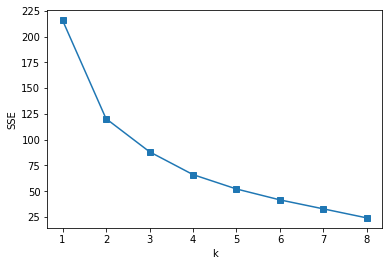

In [64]:
# №3
X = df.loc[:,['Teaching','Fees','Placements','Internship','Infrastructure']]

# №4
SSE = []

for k in range(1,9):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

In [65]:
kmeans = KMeans(n_clusters=4) #после точки 4 значение по оси x резко уменьшилось

# №5
kmeans.fit(X)
Y_pred = kmeans.labels_
Y_pred

array([2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 3, 3, 0], dtype=int32)

In [66]:
X['cluster'] = Y_pred 
X
# 2 - большинство признаков с максимальными значениями
# 0 - признаки имеет примерно среднее значение от максимального
# 1 - признаки имеет примерно ниже среднего значения от максимального
# 3 - большинство признаков с минимальными значениями

,Teaching,Fees,Placements,Internship,Infrastructure,cluster
0,5,2,5,5,3,2
1,4,2,5,5,3,2
2,4,5,5,4,5,2
3,5,4,5,4,4,2
4,2,5,2,2,5,0
5,3,4,3,3,4,0
6,1,3,1,1,2,1
7,4,4,5,5,5,2
8,4,4,4,4,4,2
9,3,4,3,4,5,0


In [69]:
# №6
X = df.loc[:,['Teaching','Internship']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

Y_pred = kmeans.labels_
Y_pred

array([1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2], dtype=int32)

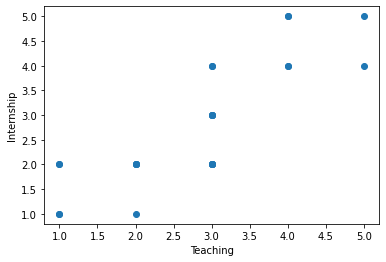

In [71]:
plt.scatter(df['Teaching'],df['Internship'])
plt.xlabel('Teaching')
plt.ylabel('Internship')
plt.show()